In [1]:
import sys

sys.path.append("..")

In [2]:
import random

import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import roc_curve, roc_auc_score, r2_score
import matplotlib.pyplot as plt

from src.util import *
from src.model import *

tqdm.pandas()

In [3]:
last_review_date = pd.to_datetime("2015/01/01")
train_split_date = pd.to_datetime("2017/01/01")
test_split_date = pd.to_datetime("2018/01/01")

seed = 0
random.seed(seed)
np.random.seed(seed)

In [4]:
interaction_df, user_le, item_le = load_interaction_df(
    last_review_date=last_review_date,
    train_split_date=train_split_date,
)

train_dataset, test_dataset, user_embedding_weight = create_dataset(
    interaction_df=interaction_df,
    train_split_date=train_split_date,
    test_split_date=test_split_date,
)

100%|██████████| 25093/25093 [00:00<00:00, 263701.30it/s]


In [5]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

target_loss_weight = 1
clv_loss_weight = 1
alpha = target_loss_weight / (target_loss_weight + clv_loss_weight)

args = Args(
    d_model=32,
    batch_size=64,
    nhead=4,
    epochs=30,
    lr=1e-3,
    sample_size=5,
    alpha=alpha,
    device=device,
    model_path="model.model",
)

try:
    model = torch.load(args.model_path)
    print(f"loaded model from: {args.model_path}")
except FileNotFoundError:
    model = Model(
        user_embedding_weight=user_embedding_weight,
        item_size=len(item_le.classes_),
        d_model=args.d_model,
        nhead=args.nhead,
    )
model.to(args.device)
model.train()

print(f"args: {args}")
train_results, test_results = train(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    args=args,
    items=item_le.classes_,
)

torch.save(model, args.model_path)

args: Args(d_model=32, batch_size=64, nhead=4, epochs=30, lr=0.001, sample_size=5, alpha=0.5, context_item_size=9, device='mps', model_path='model.model')
[epoch: 1/30]


100%|██████████| 393/393 [00:35<00:00, 11.19it/s]


[loss] target_loss: 0.3302635439309, clv_loss: 0.1641797093774071
[alpha_weighted_loss] target_loss: 0.16513177196545, clv_loss: 0.08208985468870356


100%|██████████| 393/393 [00:07<00:00, 50.98it/s]


[loss] target_loss: 0.3231610694080212, clv_loss: 0.15553451895372558
[alpha_weighted_loss] target_loss: 0.1615805347040106, clv_loss: 0.07776725947686279
[epoch: 2/30]


100%|██████████| 393/393 [00:22<00:00, 17.75it/s]


[loss] target_loss: 0.31846207888375105, clv_loss: 0.15687962482107504
[alpha_weighted_loss] target_loss: 0.15923103944187553, clv_loss: 0.07843981241053752


100%|██████████| 393/393 [00:05<00:00, 71.71it/s]


[loss] target_loss: 0.32207336077708326, clv_loss: 0.15247015673998962
[alpha_weighted_loss] target_loss: 0.16103668038854163, clv_loss: 0.07623507836999481
[epoch: 3/30]


100%|██████████| 393/393 [00:18<00:00, 21.23it/s]


[loss] target_loss: 0.3114820970151261, clv_loss: 0.15684859284955732
[alpha_weighted_loss] target_loss: 0.15574104850756304, clv_loss: 0.07842429642477866


100%|██████████| 393/393 [00:05<00:00, 72.18it/s]


[loss] target_loss: 0.3185422769712128, clv_loss: 0.15410064217698483
[alpha_weighted_loss] target_loss: 0.1592711384856064, clv_loss: 0.07705032108849241
[epoch: 4/30]


100%|██████████| 393/393 [00:19<00:00, 20.16it/s]


[loss] target_loss: 0.30433959335695393, clv_loss: 0.15572538425904195
[alpha_weighted_loss] target_loss: 0.15216979667847697, clv_loss: 0.07786269212952097


100%|██████████| 393/393 [00:04<00:00, 79.98it/s]


[loss] target_loss: 0.3174555414657253, clv_loss: 0.15369461082471841
[alpha_weighted_loss] target_loss: 0.15872777073286265, clv_loss: 0.07684730541235921
[epoch: 5/30]


100%|██████████| 393/393 [00:18<00:00, 21.10it/s]


[loss] target_loss: 0.2995628195485389, clv_loss: 0.15530655850625524
[alpha_weighted_loss] target_loss: 0.14978140977426946, clv_loss: 0.07765327925312762


100%|██████████| 393/393 [00:04<00:00, 84.66it/s]


[loss] target_loss: 0.30939348462883753, clv_loss: 0.15412037102055307
[alpha_weighted_loss] target_loss: 0.15469674231441877, clv_loss: 0.07706018551027653
[epoch: 6/30]


100%|██████████| 393/393 [00:18<00:00, 21.71it/s]


[loss] target_loss: 0.2962131466119344, clv_loss: 0.15622380493403087
[alpha_weighted_loss] target_loss: 0.1481065733059672, clv_loss: 0.07811190246701544


100%|██████████| 393/393 [00:05<00:00, 74.10it/s]


[loss] target_loss: 0.3082738299937042, clv_loss: 0.15367606978000878
[alpha_weighted_loss] target_loss: 0.1541369149968521, clv_loss: 0.07683803489000439
[epoch: 7/30]


100%|██████████| 393/393 [00:18<00:00, 20.80it/s]


[loss] target_loss: 0.29073738445155795, clv_loss: 0.15555213971902396
[alpha_weighted_loss] target_loss: 0.14536869222577897, clv_loss: 0.07777606985951198


100%|██████████| 393/393 [00:04<00:00, 83.78it/s]


[loss] target_loss: 0.30383466095983525, clv_loss: 0.1535414496256612
[alpha_weighted_loss] target_loss: 0.15191733047991762, clv_loss: 0.0767707248128306
[epoch: 8/30]


100%|██████████| 393/393 [00:17<00:00, 21.98it/s]


[loss] target_loss: 0.28773359722118946, clv_loss: 0.1548632660420948
[alpha_weighted_loss] target_loss: 0.14386679861059473, clv_loss: 0.0774316330210474


100%|██████████| 393/393 [00:04<00:00, 84.29it/s]


[loss] target_loss: 0.3007585248097057, clv_loss: 0.15359429815077902
[alpha_weighted_loss] target_loss: 0.15037926240485286, clv_loss: 0.07679714907538951
[epoch: 9/30]


100%|██████████| 393/393 [00:17<00:00, 22.18it/s]


[loss] target_loss: 0.2839922423429465, clv_loss: 0.1546843059351502
[alpha_weighted_loss] target_loss: 0.14199612117147326, clv_loss: 0.0773421529675751


100%|██████████| 393/393 [00:04<00:00, 84.03it/s]


[loss] target_loss: 0.3005009355549594, clv_loss: 0.15619422888748216
[alpha_weighted_loss] target_loss: 0.1502504677774797, clv_loss: 0.07809711444374108
[epoch: 10/30]


100%|██████████| 393/393 [00:18<00:00, 21.30it/s]


[loss] target_loss: 0.2818535054837171, clv_loss: 0.15311996201313938
[alpha_weighted_loss] target_loss: 0.14092675274185856, clv_loss: 0.07655998100656969


100%|██████████| 393/393 [00:04<00:00, 80.32it/s]


[loss] target_loss: 0.2972875966598059, clv_loss: 0.1527012252360203
[alpha_weighted_loss] target_loss: 0.14864379832990296, clv_loss: 0.07635061261801016
[epoch: 11/30]


100%|██████████| 393/393 [00:17<00:00, 21.96it/s]


[loss] target_loss: 0.2776007551804147, clv_loss: 0.15412889639005709
[alpha_weighted_loss] target_loss: 0.13880037759020736, clv_loss: 0.07706444819502854


100%|██████████| 393/393 [00:04<00:00, 79.87it/s]


[loss] target_loss: 0.29365901857538684, clv_loss: 0.15391292261865
[alpha_weighted_loss] target_loss: 0.14682950928769342, clv_loss: 0.076956461309325
[epoch: 12/30]


100%|██████████| 393/393 [00:17<00:00, 21.92it/s]


[loss] target_loss: 0.2758304139660818, clv_loss: 0.15447321203335854
[alpha_weighted_loss] target_loss: 0.1379152069830409, clv_loss: 0.07723660601667927


100%|██████████| 393/393 [00:04<00:00, 85.15it/s]


[loss] target_loss: 0.29167093105291897, clv_loss: 0.15321859949607278
[alpha_weighted_loss] target_loss: 0.14583546552645948, clv_loss: 0.07660929974803639
[epoch: 13/30]


100%|██████████| 393/393 [00:17<00:00, 22.28it/s]


[loss] target_loss: 0.27482528347550456, clv_loss: 0.15396329503667566
[alpha_weighted_loss] target_loss: 0.13741264173775228, clv_loss: 0.07698164751833783


100%|██████████| 393/393 [00:04<00:00, 85.23it/s]


[loss] target_loss: 0.2923678503236698, clv_loss: 0.15330389585658794
[alpha_weighted_loss] target_loss: 0.1461839251618349, clv_loss: 0.07665194792829397
[epoch: 14/30]


100%|██████████| 393/393 [00:17<00:00, 22.56it/s]


[loss] target_loss: 0.27181445260273895, clv_loss: 0.1542555406860268
[alpha_weighted_loss] target_loss: 0.13590722630136948, clv_loss: 0.0771277703430134


100%|██████████| 393/393 [00:05<00:00, 78.50it/s]


[loss] target_loss: 0.2873326777539787, clv_loss: 0.1542679765960794
[alpha_weighted_loss] target_loss: 0.14366633887698935, clv_loss: 0.0771339882980397
[epoch: 15/30]


100%|██████████| 393/393 [00:17<00:00, 22.21it/s]


[loss] target_loss: 0.2691702068079519, clv_loss: 0.15390400087067493
[alpha_weighted_loss] target_loss: 0.13458510340397595, clv_loss: 0.07695200043533747


100%|██████████| 393/393 [00:04<00:00, 85.26it/s]


[loss] target_loss: 0.2863199729804168, clv_loss: 0.15233955390125742
[alpha_weighted_loss] target_loss: 0.1431599864902084, clv_loss: 0.07616977695062871
[epoch: 16/30]


100%|██████████| 393/393 [00:17<00:00, 22.01it/s]


[loss] target_loss: 0.26777269420126315, clv_loss: 0.15375249290663473
[alpha_weighted_loss] target_loss: 0.13388634710063158, clv_loss: 0.07687624645331737


100%|██████████| 393/393 [00:04<00:00, 83.27it/s]


[loss] target_loss: 0.283281900993437, clv_loss: 0.15394729730357953
[alpha_weighted_loss] target_loss: 0.1416409504967185, clv_loss: 0.07697364865178977
[epoch: 17/30]


100%|██████████| 393/393 [00:18<00:00, 21.06it/s]


[loss] target_loss: 0.2659155303285322, clv_loss: 0.15543437602221208
[alpha_weighted_loss] target_loss: 0.1329577651642661, clv_loss: 0.07771718801110604


100%|██████████| 393/393 [00:05<00:00, 75.74it/s]


[loss] target_loss: 0.2816386838602352, clv_loss: 0.15493795882351222
[alpha_weighted_loss] target_loss: 0.1408193419301176, clv_loss: 0.07746897941175611
[epoch: 18/30]


100%|██████████| 393/393 [00:18<00:00, 21.50it/s]


[loss] target_loss: 0.2631430662694475, clv_loss: 0.1524763795957159
[alpha_weighted_loss] target_loss: 0.13157153313472375, clv_loss: 0.07623818979785794


100%|██████████| 393/393 [00:05<00:00, 74.93it/s]


[loss] target_loss: 0.2809285792609814, clv_loss: 0.15223670259838493
[alpha_weighted_loss] target_loss: 0.1404642896304907, clv_loss: 0.07611835129919246
[epoch: 19/30]


100%|██████████| 393/393 [00:17<00:00, 22.02it/s]


[loss] target_loss: 0.2626523106873187, clv_loss: 0.1534802468621549
[alpha_weighted_loss] target_loss: 0.13132615534365935, clv_loss: 0.07674012343107744


100%|██████████| 393/393 [00:04<00:00, 84.41it/s]


[loss] target_loss: 0.2826999825148182, clv_loss: 0.1544068852586449
[alpha_weighted_loss] target_loss: 0.1413499912574091, clv_loss: 0.07720344262932245
[epoch: 20/30]


100%|██████████| 393/393 [00:18<00:00, 21.52it/s]


[loss] target_loss: 0.25998268172182804, clv_loss: 0.15253596732501917
[alpha_weighted_loss] target_loss: 0.12999134086091402, clv_loss: 0.07626798366250959


100%|██████████| 393/393 [00:04<00:00, 84.18it/s]


[loss] target_loss: 0.27871181013929935, clv_loss: 0.15491329533529039
[alpha_weighted_loss] target_loss: 0.13935590506964968, clv_loss: 0.07745664766764519
[epoch: 21/30]


100%|██████████| 393/393 [00:18<00:00, 20.82it/s]


[loss] target_loss: 0.2601426529292842, clv_loss: 0.15381055706329927
[alpha_weighted_loss] target_loss: 0.1300713264646421, clv_loss: 0.07690527853164963


100%|██████████| 393/393 [00:04<00:00, 83.99it/s]


[loss] target_loss: 0.2789403076541939, clv_loss: 0.15448039354941318
[alpha_weighted_loss] target_loss: 0.13947015382709696, clv_loss: 0.07724019677470659
[epoch: 22/30]


100%|██████████| 393/393 [00:17<00:00, 22.15it/s]


[loss] target_loss: 0.2565710674544782, clv_loss: 0.15171122801212863
[alpha_weighted_loss] target_loss: 0.1282855337272391, clv_loss: 0.07585561400606432


100%|██████████| 393/393 [00:04<00:00, 79.75it/s]


[loss] target_loss: 0.2783625618798739, clv_loss: 0.1531765856341703
[alpha_weighted_loss] target_loss: 0.13918128093993695, clv_loss: 0.07658829281708515
[epoch: 23/30]


100%|██████████| 393/393 [00:18<00:00, 21.53it/s]


[loss] target_loss: 0.25562330423060414, clv_loss: 0.15244235369227543
[alpha_weighted_loss] target_loss: 0.12781165211530207, clv_loss: 0.07622117684613772


100%|██████████| 393/393 [00:04<00:00, 83.03it/s]


[loss] target_loss: 0.27742722467460096, clv_loss: 0.15401255710965198
[alpha_weighted_loss] target_loss: 0.13871361233730048, clv_loss: 0.07700627855482599
[epoch: 24/30]


100%|██████████| 393/393 [00:18<00:00, 20.70it/s]


[loss] target_loss: 0.25613391435404165, clv_loss: 0.15345651363958687
[alpha_weighted_loss] target_loss: 0.12806695717702082, clv_loss: 0.07672825681979344


100%|██████████| 393/393 [00:04<00:00, 84.82it/s]


[loss] target_loss: 0.27698703936796454, clv_loss: 0.15398854777482326
[alpha_weighted_loss] target_loss: 0.13849351968398227, clv_loss: 0.07699427388741163
[epoch: 25/30]


100%|██████████| 393/393 [00:18<00:00, 21.33it/s]


[loss] target_loss: 0.2541366280471247, clv_loss: 0.15279688515034492
[alpha_weighted_loss] target_loss: 0.12706831402356236, clv_loss: 0.07639844257517246


100%|██████████| 393/393 [00:04<00:00, 84.66it/s]


[loss] target_loss: 0.2767861670513493, clv_loss: 0.1527892847618908
[alpha_weighted_loss] target_loss: 0.13839308352567464, clv_loss: 0.0763946423809454
[epoch: 26/30]


100%|██████████| 393/393 [00:18<00:00, 21.62it/s]


[loss] target_loss: 0.2536374430904407, clv_loss: 0.1528089032496584
[alpha_weighted_loss] target_loss: 0.12681872154522034, clv_loss: 0.0764044516248292


100%|██████████| 393/393 [00:04<00:00, 84.63it/s]


[loss] target_loss: 0.27727841201022685, clv_loss: 0.15476367984952893
[alpha_weighted_loss] target_loss: 0.13863920600511342, clv_loss: 0.07738183992476447
[epoch: 27/30]


100%|██████████| 393/393 [00:19<00:00, 19.81it/s]


[loss] target_loss: 0.25243996967189486, clv_loss: 0.153456681898532
[alpha_weighted_loss] target_loss: 0.12621998483594743, clv_loss: 0.076728340949266


100%|██████████| 393/393 [00:04<00:00, 81.79it/s]


[loss] target_loss: 0.2740369089156313, clv_loss: 0.156946840992259
[alpha_weighted_loss] target_loss: 0.13701845445781566, clv_loss: 0.0784734204961295
[epoch: 28/30]


100%|██████████| 393/393 [00:19<00:00, 20.67it/s]


[loss] target_loss: 0.25223159232667386, clv_loss: 0.15215671484289886
[alpha_weighted_loss] target_loss: 0.12611579616333693, clv_loss: 0.07607835742144943


100%|██████████| 393/393 [00:04<00:00, 80.49it/s]


[loss] target_loss: 0.27373062843888163, clv_loss: 0.15552543065778476
[alpha_weighted_loss] target_loss: 0.13686531421944081, clv_loss: 0.07776271532889238
[epoch: 29/30]


100%|██████████| 393/393 [00:18<00:00, 21.25it/s]


[loss] target_loss: 0.2509053024171873, clv_loss: 0.1530877522953594
[alpha_weighted_loss] target_loss: 0.12545265120859364, clv_loss: 0.0765438761476797


100%|██████████| 393/393 [00:04<00:00, 85.04it/s]


[loss] target_loss: 0.2746026999016148, clv_loss: 0.15484735795294358
[alpha_weighted_loss] target_loss: 0.1373013499508074, clv_loss: 0.07742367897647179
[epoch: 30/30]


100%|██████████| 393/393 [00:18<00:00, 21.43it/s]


[loss] target_loss: 0.250610625850032, clv_loss: 0.1533913852092419
[alpha_weighted_loss] target_loss: 0.125305312925016, clv_loss: 0.07669569260462095


100%|██████████| 393/393 [00:04<00:00, 79.67it/s]

[loss] target_loss: 0.2711983952225771, clv_loss: 0.15250420777966048
[alpha_weighted_loss] target_loss: 0.13559919761128855, clv_loss: 0.07625210388983024


In [91]:
model.eval()

sample_size = 100

for (user_id, user_context_items), target_items, clv in test_dataset:
    if len(target_items) == 0:
        continue

    b = None
    for _ in range(10):
        user_ids = []
        item_indices = []

        context_items = []
        for _ in range(args.context_item_size):
            context_items.append(user_context_items[random.randrange(len(user_context_items))])

        for target in item_le.classes_:
            v = list(context_items)
            v.append(target)
            user_ids.append(user_id)
            item_indices.append(v)

        user_ids = torch.LongTensor(user_ids).to(args.device)
        item_indices = torch.LongTensor(item_indices).to(args.device)

        with torch.no_grad():
            y_clv, y_target = model.forward(user_ids, item_indices)

        a = y_target.cpu().detach().numpy()
        if b is None:
            b = a
        else:
            b += a
    b /= 10
    filtered_items = item_le.classes_[np.argsort(b)][::-1][:100] # 降順でソートし、上位100件を取得する

    # clv_sum = []

    # for item in filtered_items:
    #     user_ids = []
    #     item_indices = []

    #     for _ in range(sample_size):
    #         context_items = []
    #         for _ in range(args.context_item_size):
    #             context_items.append(user_context_items[random.randrange(len(user_context_items))])

    #         v = list(context_items)
    #         v.append(item)
    #         user_ids.append(user_id)
    #         item_indices.append(v)

    #     user_ids = torch.LongTensor(user_ids).to(args.device)
    #     item_indices = torch.LongTensor(item_indices).to(args.device)

    #     with torch.no_grad():
    #         y_clv, y_target = model.forward(user_ids, item_indices)

    #     clv_sum.append(y_clv.sum().item())

    # recommendation = filtered_items[np.argsort(clv_sum)][::-1]
    print(len(set(filtered_items[:10]) & set(target_items)), "/", len(target_items))

1 / 155
0 / 3
0 / 15
0 / 2
0 / 2
2 / 196
0 / 44
0 / 7
0 / 40
0 / 17
0 / 59
0 / 212
1 / 257
0 / 74
1 / 382
0 / 15
0 / 40
0 / 1


KeyboardInterrupt: 

(array([132.,  15.,   5.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([0.02307053, 0.06275731, 0.1024441 , 0.14213088, 0.18181767,
        0.22150445, 0.26119122, 0.30087802, 0.34056479, 0.38025159,
        0.41993836]),
 <BarContainer object of 10 artists>)

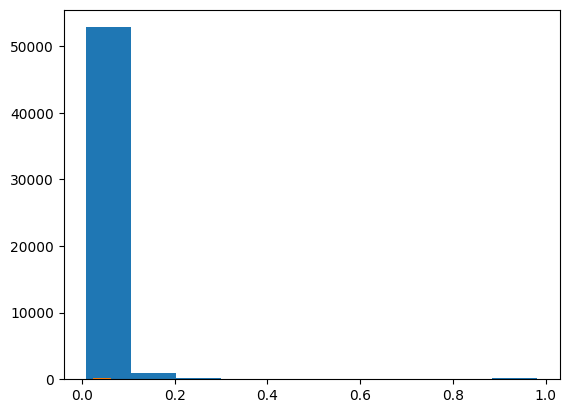

In [89]:
plt.hist(a)
plt.hist(a[target_items])

(array([113.,  45.,  41.,  35.,  28.,  45.,  41.,  22.,   4.]),
 array([0.1       , 0.2       , 0.30000001, 0.40000001, 0.5       ,
        0.60000002, 0.69999999, 0.80000001, 0.89999998, 1.        ]),
 <BarContainer object of 9 artists>)

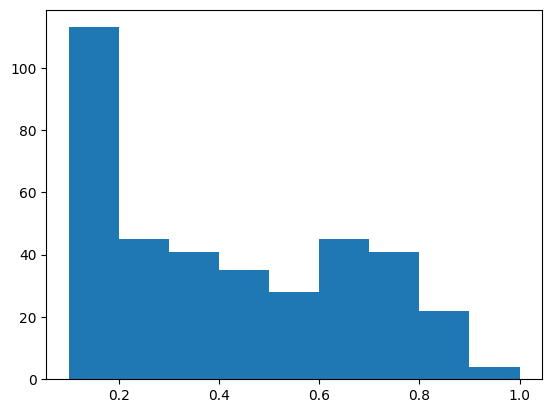

In [70]:
plt.hist(y_target.cpu(), bins=9, range=(0.1, 1))

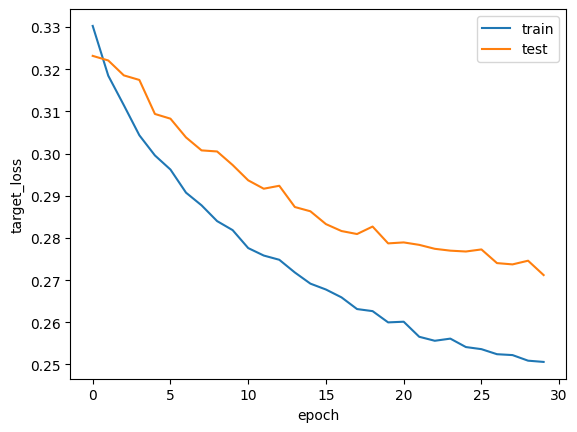

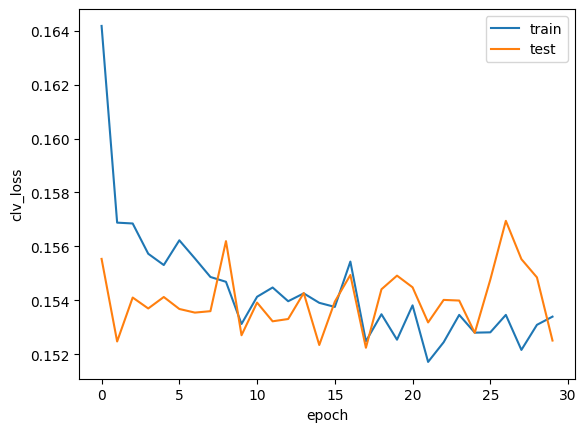

In [6]:
loss_names = ["target", "clv"]
for loss_name in loss_names:
    train_losses = list(map(lambda result: result[loss_name]["loss"], train_results))
    test_losses = list(map(lambda result: result[loss_name]["loss"], test_results))
    plt.plot(train_losses, label="train")
    plt.plot(test_losses, label="test")
    plt.xlabel("epoch")
    plt.ylabel(f"{loss_name}_loss")
    plt.legend()
    plt.show()

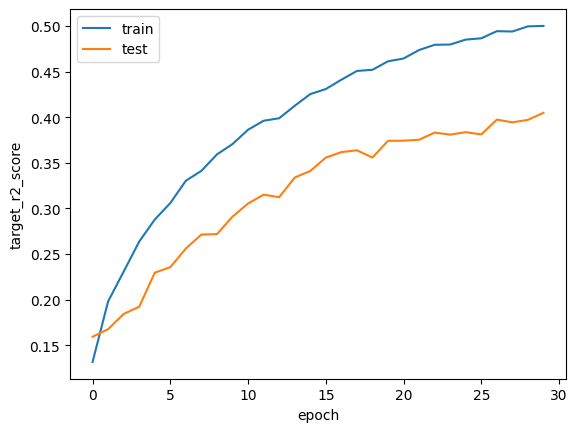

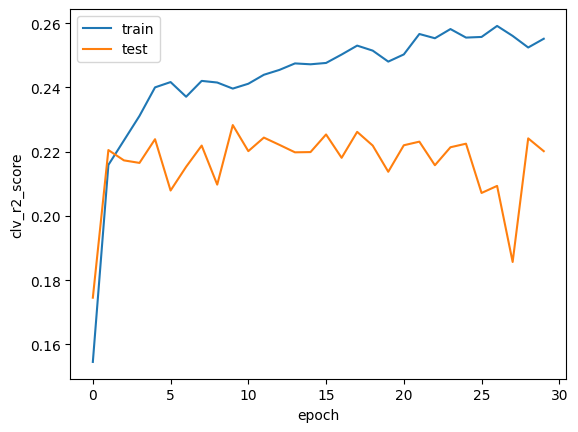

In [10]:
for loss_name in loss_names:
    train_r2_scores = list(
        map(
            lambda result: r2_score(
                result[loss_name]["y_true"], result[loss_name]["y_pred"]
            ),
            train_results,
        )
    )
    test_r2_scores = list(
        map(
            lambda result: r2_score(
                result[loss_name]["y_true"], result[loss_name]["y_pred"]
            ),
            test_results,
        )
    )

    plt.plot(train_r2_scores, label="train")
    plt.plot(test_r2_scores, label="test")
    plt.xlabel("epoch")
    plt.ylabel(f"{loss_name}_r2_score")
    plt.legend()
    plt.show()

Text(0, 0.5, 'y_pred')

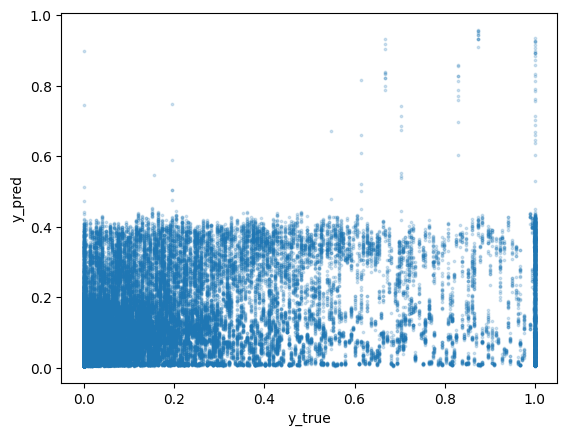

In [32]:
plt.scatter(train_results[-1]["clv"]["y_true"], train_results[-1]["clv"]["y_pred"], alpha=0.2, s=3)
plt.xlabel("y_true")
plt.ylabel("y_pred")

ROC: 0.9232702020498007


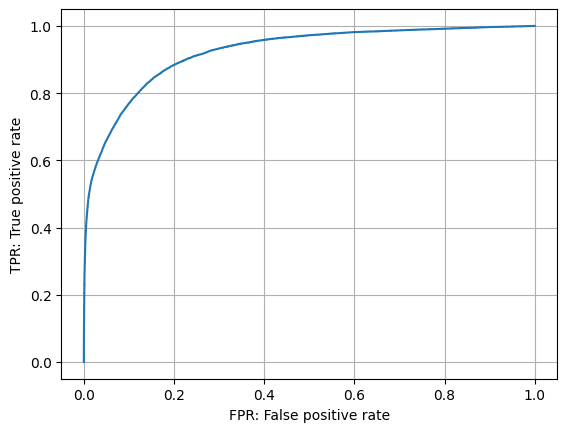

ROC: 0.8943133095988586


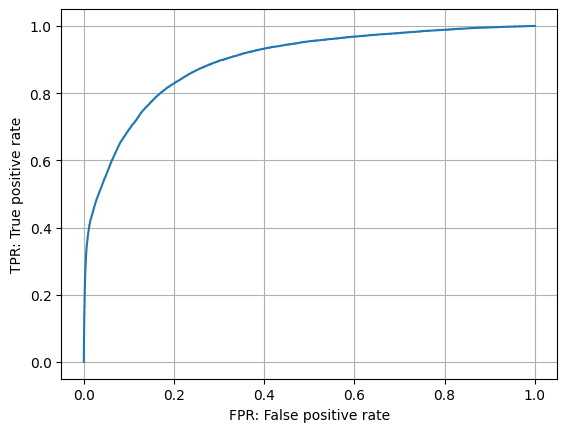

In [14]:
def plot_roc_auc(results: list[dict]):
    fpr, tpr, _ = roc_curve(
        results[-1]["target"]["y_true"], results[-1]["target"]["y_pred"]
    )
    print("ROC:", roc_auc_score(results[-1]["target"]["y_true"], results[-1]["target"]["y_pred"]))

    plt.plot(fpr, tpr)
    plt.xlabel("FPR: False positive rate")
    plt.ylabel("TPR: True positive rate")
    plt.grid()
    plt.show()

plot_roc_auc(train_results)
plot_roc_auc(test_results)